In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("car_evaluation.csv")
print(cars.head())

  buying  maint  doors  persons lug_boot safety outcome
0  vhigh  vhigh      2        2    small    low   unacc
1  vhigh  vhigh      2        2    small    med   unacc
2  vhigh  vhigh      2        2    small   high   unacc
3  vhigh  vhigh      2        2      med    low   unacc
4  vhigh  vhigh      2        2      med    med   unacc


In [3]:
X = cars.iloc[:, :-1]
y = cars['outcome']

In [4]:
enc = LabelEncoder()
X['buying'] = enc.fit_transform(X['buying'])
X['maint'] = enc.fit_transform(X['maint'])
X['lug_boot'] = enc.fit_transform(X['lug_boot'])
X['safety'] = enc.fit_transform(X['safety'])

In [5]:
print(X.head())

   buying  maint  doors  persons  lug_boot  safety
0       3      3      2        2         2       1
1       3      3      2        2         2       2
2       3      3      2        2         2       0
3       3      3      2        2         1       1
4       3      3      2        2         1       2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test, y_predict)

0.9190751445086706

In [8]:

print("Classification Report:")
print(classification_report(y_test, y_predict))
print("Unique outcomes:", cars['outcome'].unique())


Classification Report:
              precision    recall  f1-score   support

         acc       0.84      0.81      0.82       118
        good       0.56      0.47      0.51        19
       unacc       0.95      1.00      0.98       358
       vgood       1.00      0.62      0.77        24

    accuracy                           0.92       519
   macro avg       0.84      0.73      0.77       519
weighted avg       0.92      0.92      0.92       519

Unique outcomes: ['unacc' 'acc' 'vgood' 'good']


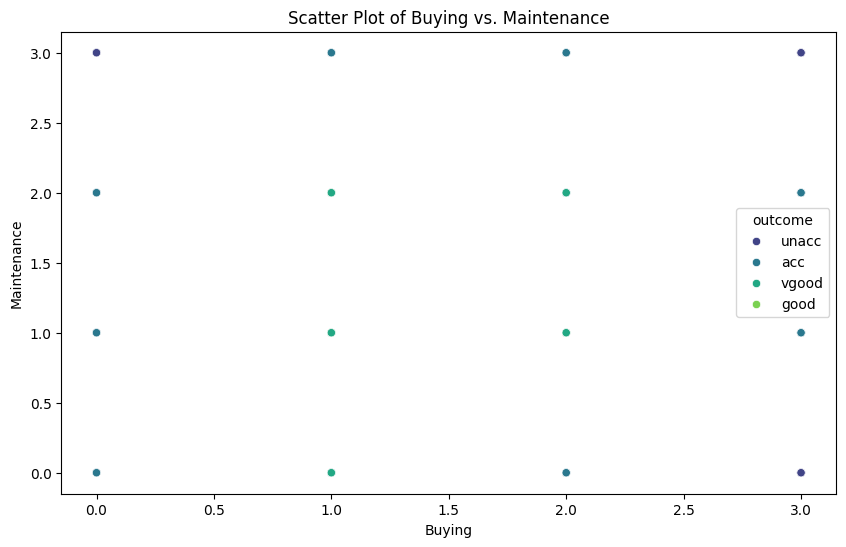

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['buying'], y=X['maint'], hue=y, palette='viridis')
plt.title('Scatter Plot of Buying vs. Maintenance')
plt.xlabel('Buying')
plt.ylabel('Maintenance')
plt.show()

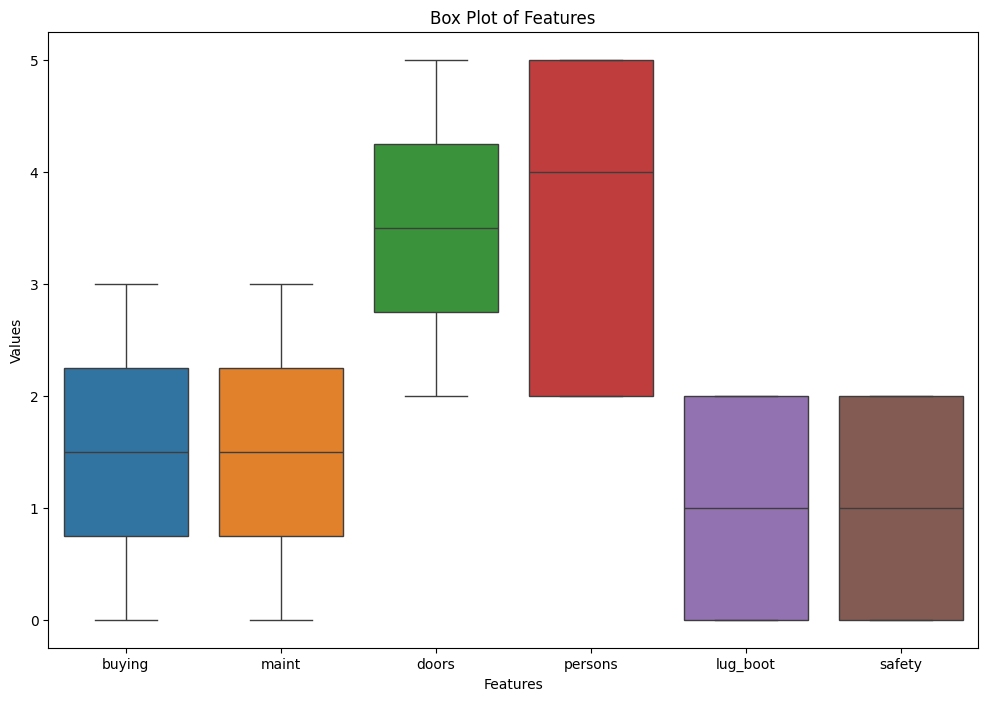

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

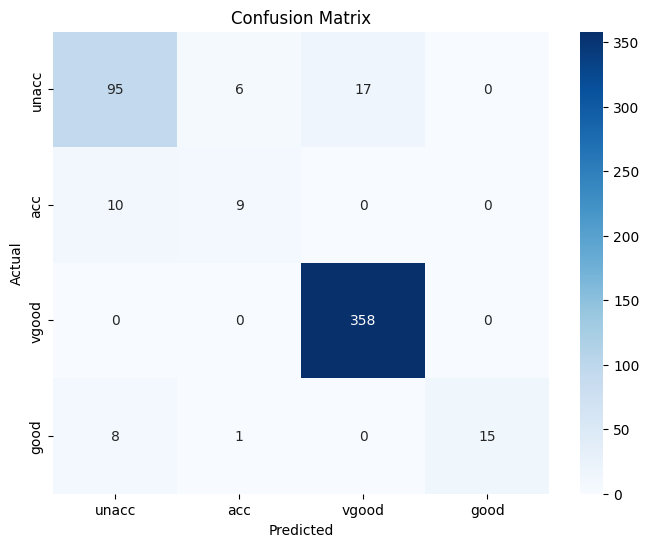

In [11]:
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cars['outcome'].unique(), yticklabels=cars['outcome'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()